# LinearRegression
linear regression and polynomial regression with multiple input 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [7]:
data = pd.read_csv("automobile_price.csv")
data.drop(['symboling','normalized-losses'],axis=1,inplace=True) #inplace=True to change the actual data otherwise it will return other dataframe
data.head(10)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [8]:
from IPython.core.interactiveshell import InteractiveShell as iShell

iShell.ast_node_interactivity = "all"

x_labels = data.drop('price',axis=1)
y_labels = data[['price']]

x_labels.head(10)
y_labels.head(10)


,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22
5,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
6,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
7,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,...,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25
8,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,...,five,131,mpfi,3.13,3.40,8.3,140,5500,17,20
9,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,...,five,131,mpfi,3.13,3.40,7.0,160,5500,16,22


,price
0,13495
1,16500
2,16500
3,13950
4,17450
5,15250
6,17710
7,18920
8,23875
9,?


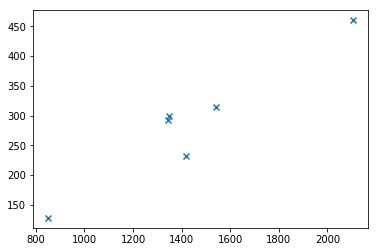

In [9]:
%matplotlib inline
x = np.array([2104,1416,1543,852,1342,1350])
y = np.array([460,232,315,128,292,300])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y,marker="x")

[-460 -232 -315 -128 -292 -300]
[2104 1416 1543  852 1342 1350]
[-967840 -328512 -486045 -109056 -391864 -405000]
[4808.27083333 4046.12416667 4145.89833333 3338.43416667 3879.62583333
 3883.13916667]
[2104 1416 1543  852 1342 1350]
[10116601.83333333  5729311.82        6397121.12833333  2844345.91
  5206457.86833333  5242237.875     ]
[-67063.07637917 -54007.0340125  -56458.00113542 -43387.0225375
 -52687.27364167 -52844.436925  ]
[2104 1416 1543  852 1342 1350]
[-1.41100713e+08 -7.64739602e+07 -8.71146958e+07 -3.69657432e+07
 -7.07063212e+07 -7.13399898e+07]
[908391.57695198 734284.76173007 766382.75233062 591474.75622838
 715473.63334864 717492.78236285]
[2104 1416 1543  852 1342 1350]
[1.91125588e+09 1.03974722e+09 1.18252859e+09 5.03936492e+08
 9.60165616e+08 9.68615256e+08]
[-12336886.42726915  -9969119.75839827 -10406233.87896019
  -8028184.64031226  -9714531.70389763  -9742069.2233031 ]
[2104 1416 1543  852 1342 1350]
[-2.59568090e+10 -1.41162736e+10 -1.60568189e+10 -6.84001331

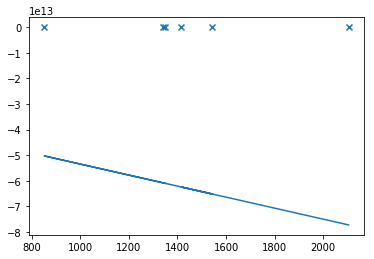

In [20]:
import math

def cost_function(prediction,y):
    error = 0
    squared_errors = [(prediction[i] - y[i])**2 for i in range(len(y))]
    for e in squared_errors:
        error += e
    return error/2

def batch_gradient(inital,alpha,x,y,times=100):
    m = len(y)
    #print(w1,w2)
    h = inital[0]*x + inital[1]
    #print(inital[0])
    #print(y - h)
    print(h - y)
    print(x)
    #print(sum((h-y)*x))
    print((h-y)*x)
    inital[0] = inital[0] - alpha*(1/m)*(np.sum(h-y))
    inital[1] = inital[1] - alpha*(1/m)*np.sum(np.dot((h-y),x))
    cost = cost_function(h,y)
    return cost,inital

def sorchastic_gradient(inital,alpha,x,y,times=100):
    pass

weight=[0,0]
jcost = []
for i in range(10):
    cost,weight = batch_gradient(weight,0.005,x,y)
    jcost.append(cost)
    
y_dash = weight[0]*x + weight[1]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(x,y,marker="x")
ax.plot(x,y_dash)
#print(w1,w2)

#print(cost_function(y_dash,y))
#ax.plot(y_dash)

In [ ]:
def cost_function():
    pass

def gradient_descent():
    pass

def predict():
    pass

In [ ]:
%matplotlib inline

